Statistics One, 2013, HW 5
Alan Crosswell
based on Lab 5 sample R program

Here's the assignment:

We now come back to our dataset including salary as an outcome
variable and years of professional experience and courses completed
as predictors.


In [1]:
#setwd("/Users/alan/stats")
# Load packages
install.packages("psych")
install.packages("ggplot2")
library(psych)
library(ggplot2)

Installing package into ‘/Users/alan/Library/R/3.3/library’
(as ‘lib’ is unspecified)



  There is a binary version available but the source version is later:
        binary source needs_compilation
psych 1.7.3.21  1.7.5             FALSE



installing the source package ‘psych’

Installing package into ‘/Users/alan/Library/R/3.3/library’
(as ‘lib’ is unspecified)



The downloaded binary packages are in
	/var/folders/v0/3_jhbcy13pb_d4jxwqt0w50sc0d_61/T//Rtmp2Kupyf/downloaded_packages


Warning message:
“package ‘ggplot2’ was built under R version 3.3.2”
Attaching package: ‘ggplot2’

The following objects are masked from ‘package:psych’:

    %+%, alpha



In [2]:
# same dataset as used in HW4.
Salary <- read.table("Stats1.13.HW.04.txt", header = T)
#describe(Salary)
table1 <- describe(Salary)
table1

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
ID,1,200,100.500,57.879185,100.5,100.500000,74.13000,1.0,200.0,199.0,0.00000000,-1.2180144,4.0926764
salary,2,200,75426.440,11149.127743,74407.5,75196.262500,10710.30240,48424.0,103819.0,55395.0,0.19481826,-0.2431904,788.3623832
years,3,200,7.559,1.473081,7.6,7.575625,1.33434,3.3,12.2,8.9,-0.10298303,0.4330169,0.1041626
courses,4,200,17.745,8.423464,16.5,17.731250,6.67170,0.0,36.0,36.0,0.01166261,-0.3699900,0.5956289


[1] "1. Run a regression model with salary as the outcome variable and years of experience as the predictor variable. What is the 95% confidence interval for the regression coefficient? Type your answer exactly as it appears in R but include only two decimal places (for example, if the 95% confidence interval is -1 to +1 then type -1.00 1.00)"



Call:
lm(formula = Salary$salary ~ Salary$years)

Residuals:
     Min       1Q   Median       3Q      Max 
-21356.2  -5290.8    257.5   4797.1  20298.9 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   32810.3     2763.4   11.87   <2e-16 ***
Salary$years   5637.8      358.9   15.71   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7457 on 198 degrees of freedom
Multiple R-squared:  0.5549,	Adjusted R-squared:  0.5526 
F-statistic: 246.8 on 1 and 198 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),27360.82,38259.76
Salary$years,4930.12,6345.48


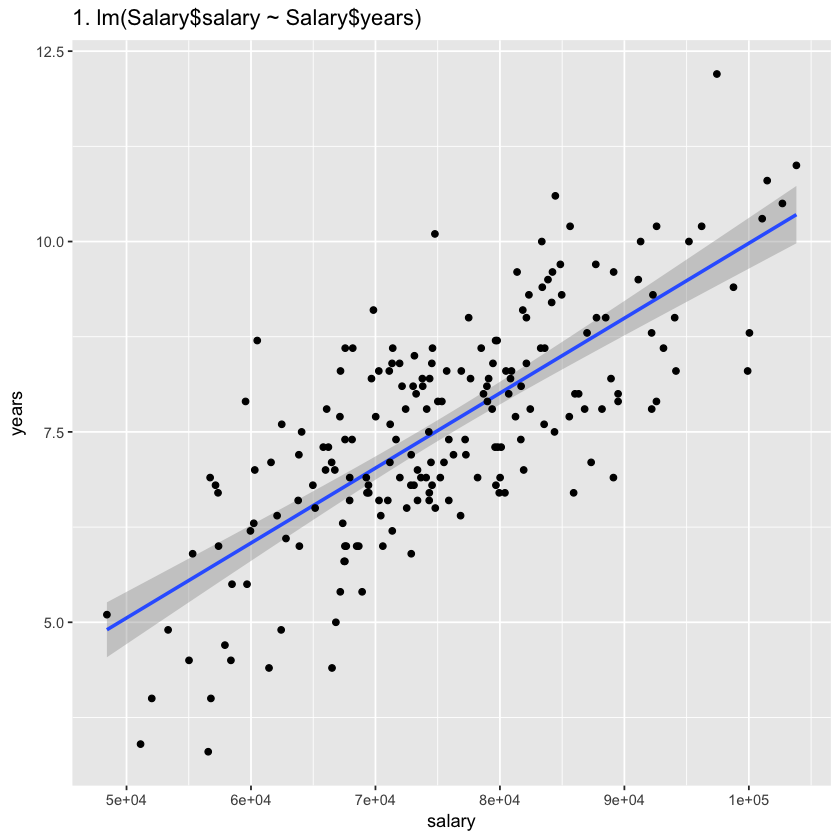

In [3]:
print("1. Run a regression model with salary as the outcome variable and years of experience as the predictor variable. What is the 95% confidence interval for the regression coefficient? Type your answer exactly as it appears in R but include only two decimal places (for example, if the 95% confidence interval is -1 to +1 then type -1.00 1.00)")

model1 <- lm(Salary$salary ~ Salary$years)
model1.z <- lm(scale(Salary$salary) ~ scale(Salary$years))
summary(model1)
# Print 95% confidence interval for the regression coefficient
round(confint(model1),2) # 4930.12 6345.48

# plot the confidence interval?

ggplot(Salary, aes(x = salary, y = years)) + geom_smooth(method = "lm") + 
  geom_point() + labs(title="1. lm(Salary$salary ~ Salary$years)")

In [ ]:
print("2. Run a regression model with salary as the outcome variable and courses as the predictor variable. What is the 95% confidence interval for the regression coefficient?")
model2 <- lm(Salary$salary ~ Salary$courses)
model2.z <- lm(scale(Salary$salary) ~ scale(Salary$courses))
summary(model2)
# Print 95% confidence interval for the regression coefficient
round(confint(model2),2) # 560.09 872.09 
# They say my answer is wrong! I don't think it is. Based on the forum, it's the
# shitty Coursera parser once again. Repaste without the extra whitespace!!

ggplot(Salary, aes(x = salary, y = courses)) + geom_smooth(method = "lm") + 
  geom_point() + labs(title="2. lm(Salary$salary ~ Salary$courses)")

In [ ]:
print("3. Run a multiple regression model with both predictors and compare it with both the model from Question 1 and the model from Question 2. Is the model with both predictors significantly better than:")
model3 <- lm(Salary$salary ~ Salary$years + Salary$courses)
model3.z <- lm(scale(Salary$salary) ~ scale(Salary$years) + scale(Salary$courses))
round(confint(model3),2) # 
summary(model1) # p=2.2e-16 (valid model). B=5637.8
summary(model2) # p=2.2e-16 (valid model). B=716.09
# compare model1 to model3
anova(model1, model3) # 4.552e-12
anova(model2, model3) # 2.2e-16
print("* both single predictor models")
print("_ the single predictor model based on years of experience")
print("_ the single predictor model based on courses")
print("_ none of the above")

# I said it is not better but the graphs show a steeper slope?

In [ ]:
ggplot(Salary, aes(x = salary, y = courses+years)) + geom_smooth(method = "lm") + 
  geom_point() + labs(title="3. lm(Salary$salary ~ Salary$courses+years)")

In [ ]:
print("4. Run a standardized multiple regression model with both predictors. Do the confidence interval values differ from the corresponding unstandardized model?")
# compare standardized model1 to model3
confint(model3)
confint(model3.z)
print("* Yes")
print("_ No")

In [ ]:
print("5. What function could you use to take a random subset of the data?")
print("sample")

print("6. Run the following command in R: set.seed(1). Now take a random subset of the original data so that N=15. Is the correlation coefficient between salary and years of experience in this sample higher or lower than in the whole data set?")
set.seed(1)

Salary.15=Salary[sample(nrow(Salary),15),]
round(cor(Salary.15[2:3]),2) # 0.70
round(cor(Salary[2:3]),2) # 0.74
print("sample coeff is lower")

In [ ]:
print("7. Take a subset of the original data from row 51 to 70. What is the percentage of variance explained by a multiple regression model with both predictors (Provide your result with no decimal place)")
Salary.subset=Salary[51:70,]

model3.subset <- lm(Salary.subset$salary ~ Salary.subset$years + Salary.subset$courses)
summary(model3.subset)
# percentage of variance is Multiple R-squared: 85%

In [ ]:
print("8. Using model comparison, which model provides the best fit for the subsetted data from Question 7?")

model1.subset <- lm(Salary.subset$salary ~ Salary.subset$years)
model2.subset <- lm(Salary.subset$salary ~ Salary.subset$courses)
summary(model1.subset) # 2.281e-06
summary(model2.subset) # 3.386e-06
summary(model3.subset) # 9.451e-08
anova(model1.subset,model3.subset) # 0.00124
anova(model2.subset,model3.subset) # 9.28e-05

print("_ model1.subset = lm(data.subset$salary ~ data.subset$years)")
print("_ model2.subset = lm(data.subset$salary ~ data.subset$courses)")
print("* model3.subset = lm(data.subset$salary ~ data.subset$years + data.subset$courses)")
print("_ they are all equal")


In [ ]:
ggplot(Salary.subset, aes(x = salary, y = years)) + geom_smooth(method = "lm") + 
  geom_point() + labs(title="8a. lm(Salary.subset$salary ~ Salary.subset$years)")

In [ ]:
ggplot(Salary.subset, aes(x = salary, y = courses)) + geom_smooth(method = "lm") + 
  geom_point() + labs(title="8b. lm(Salary.subset$salary ~ Salary.subset$course)")

In [ ]:
ggplot(Salary.subset, aes(x = salary, y = courses+years)) + geom_smooth(method = "lm") + 
  geom_point() + 
  labs(title="8c. lm(Salary.subset$salary ~ Salary.subset$courses + Salary.subset$years)")

In [ ]:
print("9. What is the correlation between the salary values predicted by the multiple regression model and the actual salary scores in the subsetted data? (Provide your result rounded to 2 decimal places)")

cor(Salary.subset$salary,model3.subset$fitted.values) # 0.92

foo <- data.frame(fitted.values=model3.subset$fitted.values,salary=Salary.subset$salary)

In [ ]:
ggplot(foo,aes(x=fitted.values,y=salary)) + geom_smooth(method = "lm") + geom_point() +
  labs(title="9. Correlation between predicted and actual salary scores")

In [ ]:
print("10. Compute the correlation between the scores predicted by the multiple regression model and the residuals from the same model. Is the correlation statistically significant?")

# I beleive this one is for the full model, not the subset.

cor(model3$fitted.values,resid(model3)) # 1.49e-16

print("_ Yes")
print("* No")

bar <- data.frame(fitted.values=model3$fitted.values,resid=resid(model3))

In [ ]:
ggplot(bar,aes(x=fitted.values,y=resid)) +  geom_smooth(method = "lm") + geom_point() +
  labs(title="10. Cor. between scores predicted by mult. regression and residuals")